추가할 데이터 : 암호화폐 데이터, 미국 주가 데이터
* 
*
* 



In [ ]:
#엑셀파일을 업로드 하는 방법 잘알아두자.
from google.colab import files
uploaded = files.upload()

Saving data3.xlsx to data3.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

workbook = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/핀테크 아카데미_인공지능/data3.xlsx')

메모를 할 수 있습니다.

In [ ]:
workbook
#1은 target = 과거 #2는 input = 현재

,1,2
0,78700,78600
1,77400,78700
2,76900,77400
3,78300,76900
4,78300,78300
...,...,...
180,60800,61500
181,60000,60800
182,59100,60000
183,59900,59100


In [ ]:
input_yesterday = workbook[2]

In [ ]:
target_today = workbook[1]

In [ ]:
import matplotlib.pyplot as plt
#차트를 그리는 함수를 plt로 이름을 줄여서 불러옵니다.

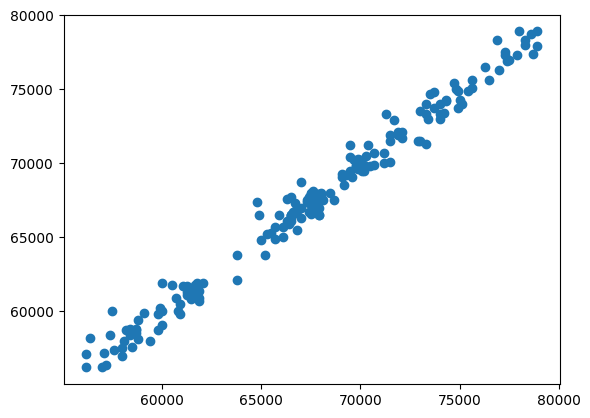

In [ ]:
plt.scatter(input_yesterday, target_today)

In [ ]:
from sklearn.model_selection import train_test_split

#훈련을 위한 데이터, 검증(test)를 위한 데이터(길이)와 무게(target)로 데이터를 나누고, 랜덤42이라고 지정해 이를 실행합니다. 
train_input, test_input, train_target, test_target= train_test_split(input_yesterday, target_today,  test_size=0.25, random_state=42)
#테스트세트 사이즈 변경 방법 : test_size 값을 0.3, 0.25 등으로 변경 

In [ ]:
#데이터 입력 중 배열(arrary)를 가지고 오기 위해 numpy를 np라고 해서 불러옵니다.
import numpy as np

In [ ]:
#데이터를 입력
price_input = np.array(input_yesterday)
price_output = np.array(target_today)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(price_input, price_output, random_state=42)
#랜덤스테이트를 바꾼다.

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
train_input

array([[74200],
       [66500],
       [67400],
       [68500],
       [58000],
       [77400],
       [62100],
       [71700],
       [61400],
       [58700],
       [66600],
       [56200],
       [73000],
       [58100],
       [61300],
       [68000],
       [67800],
       [74300],
       [65500],
       [73300],
       [66500],
       [67700],
       [68000],
       [77300],
       [61500],
       [58800],
       [78000],
       [73500],
       [66100],
       [78300],
       [73700],
       [67900],
       [58400],
       [67900],
       [61300],
       [77300],
       [66400],
       [63800],
       [78600],
       [58700],
       [69900],
       [64800],
       [70500],
       [72100],
       [57200],
       [74700],
       [73000],
       [57600],
       [57400],
       [74000],
       [73300],
       [59800],
       [67000],
       [67800],
       [66600],
       [73400],
       [68100],
       [66700],
       [68000],
       [59100],
       [58200],
       [72900],
       [

In [ ]:
test_target

array([73300, 71900, 58800, 68100, 56200, 75600, 74000, 70200, 66400,
       67500, 67300, 60900, 69900, 61700, 71700, 75600, 69500, 74300,
       67500, 69500, 61800, 66700, 58000, 74900, 77300, 66800, 70700,
       74000, 61800, 68000, 68500, 70200, 66500, 60900, 69800, 74900,
       61300, 69800, 69700, 73700, 77000, 71900, 59800, 67000, 57000,
       65700, 66300])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
# k-최근접 이웃 회귀 모델을 훈련합니다
# 근접점 바꾸는 방법 : n_neighbors=5, 7 등으로 바꿈 
knr.fit(1*train_input, 1*train_target)
# 모델의 계수(가중치)를 바꿀수 있다. 

KNeighborsRegressor()

In [ ]:
print(knr.predict([[56300]]))
#8/25 종가는 59,700원 
#8/26 종가는 60,000원
#10/14 종가 56300원이고 10/17 예상종가는 57020원이다.  

[57020.]


In [ ]:
print(knr.score(train_input, train_target))

0.9826905685107572


In [ ]:
print(knr.score(test_input, test_target))

0.9829746807402396


In [ ]:
#선형회귀 모형을 위해서 LinearRegression이라는 함수를 불러옵니다.
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(1.0*train_input, 0.95*train_target)

LinearRegression()

In [ ]:
#삼성전자 주가에 대한 예측 
print(lr.predict([[56300]]))
#앞 모델의 예측값과 비교해봅니다. 
#8/26 종가는 60,000원 
#8/26 종가는 60,000원

[53577.85203915]


In [ ]:
#비선형 모델 

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
#2차 방정식으로 예측합니다. 왜 그럴까요?

In [ ]:
print(train_poly.shape, test_poly.shape)

(138, 2) (47, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[56300*2, 56300]]))
#왜 제곱을 모형에 집어넣을까요?
#8/25 종가는 59,700원 
#8/26 종가는 60,000원

[50728.07702747]


In [ ]:
print(lr.coef_, lr.intercept_)
#훈련한 모델의 기울기와 y절편을 출력

[1.83757799e-06 7.39203580e-01] 9110.708544524663


In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9819532291928034
0.9875971953616475
